# Analýza dat pro předvídání mrtvice

Semestrální práce se bude zabývat výrobou modelu, který bude na základě vstupních parametrů (pohlaví, věk, nemoci atd.) předvídat, zda u daného pacienta hrozí výskyt mrtvice. 


Originální dataset je k dispozici [zde](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset).

## Porozumění datům a doménové oblasti

Podle Světové zdravotnické organizace (WHO) je mrtvice druhou nejčastější příčinou úmrtí na světě a je zodpovědná za přibližně 11 % všech úmrtí.

Tento dataset slouží k předpovědi, zda pacientovi na základě vstupních parametrů jako je pohlaví, věk, různá onemocnění a kuřácký status hrozí výskyt mrtvice. Každá instance v datech poskytuje relevantní, anonymizované informace o konkrétním pacientovi. 

### Popis dat
Dataset obsahuje celkem 5110 instancí s dvanácti sloupci.
Konkrétně se jedná o tyto proměnné:

* **id**: jedinečný identifikátor

* **gender**: `{"Male", "Female", "Other"}` - *pohlaví pacienta*

* **age**: `<0, ∞> - integer` - *věk pacienta*

* **hypertension**: `{0, 1}` - *u pacienta byl zaznamenaný vysoký tlak*

* **heart_disease**: `{0, 1}` - *pacient trpí srdečním onemocněním*

* **ever_married**: `{"No", "Yes"}` - *zda je/byl pacient v manželském svazku*

* **work_type**: `{"children", "Govt_jov", "Never_worked", "Private", "Self-employed"}` - *typ zaměstnání*

* **Residence_type**: `{"Rural", "Urban"}` - *typ bydliště*

* **avg_glucose_level**: `<0, ∞> - decimal` - *úroveň cukru v krvi*

* **bmi**: `<0, ∞> - decimal` - *Body Mass Index*

* **smoking_status**: `{"formerly smoked", "never smoked", "smokes", "Unknown"}` - *zda a v jakém množství pacient kouří/il cigarety*

* **stroke**: `{0, 1}` - *zda u pacienta došlo k mrtvici*
<br>
<br>

Jako cílová proměnná byl pro potřeby analýzy vybrán atribut **stroke**.


## Nahrání dat


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # For plotting the dataset in seaborn
from sklearn.preprocessing import LabelEncoder # To encode string as integers
from sklearn.preprocessing import StandardScaler # Standardize the data while separing to train/test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # computes the success of chosen method

# ML ALGORITHMS:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

# FINAL REPORT
from sklearn.metrics import confusion_matrix # helper function to create confussion matrix
from sklearn.metrics import roc_curve, roc_auc_score # library for ploting ros curves
from sklearn.metrics import classification_report # does soem magic, looks cool though

### Průzkum dat


In [2]:
data = pd.read_csv("./healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


K predikci nevyužijeme sloupec id, jelikož nám identifikační čísla přiřazená k jednotlivým osobám prognózu nezpřesní.

K predikci nevyužijeme sloupec id, jelikož nám identifikační čísla přiřazená k jednotlivým osobám prognózu nezpřesní.

In [3]:
data.shape

(5110, 12)

Dataset obsahuje 5110 řádků a 12 sloupců

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [6]:
data.drop(data.index[(data["gender"] == "Other")],axis=0,inplace=True)
data["gender"].value_counts

<bound method IndexOpsMixin.value_counts of 0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
5105    Female
5106    Female
5107    Female
5108      Male
5109    Female
Name: gender, Length: 5109, dtype: object>

Jedinečné hodnota pohlaví "Other" pro nás není validní

In [7]:
data["age"].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

U nízkého věku máme malý počet pozorování, proměnnou můžeme upravit. 

In [8]:
data["heart_disease"].value_counts()

0    4833
1     276
Name: heart_disease, dtype: int64

In [9]:
100*279/(4833+276)

5.46095126247798

In [10]:
data["hypertension"].value_counts()

0    4611
1     498
Name: hypertension, dtype: int64

In [11]:
100*498/(4611+498)

9.747504403992954

Mezi počtem pozitivních a negativních hodnot je velká diference. Prevalence (procento pozitivních hodnot z celku) je velmi nízká.  Osoby se srdeční vadou netvoří ani 6 % ze všech hodnot a osoby s hypertenzí ani 10 % hodnot, z čehož vyplývá, že je dataset nevyvážený.

<AxesSubplot:>

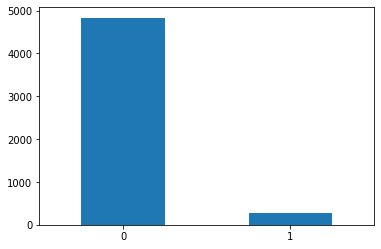

In [12]:
data.heart_disease.value_counts().plot.bar(rot = 0)

Vidíme, že algoritmus, který by vše označil jako "no stroke" by měl velmi vysokou úspěšnost, a k tomuto výsledku by se schylovaly i veškeré ostatní algoritmy. Proto použijeme random oversampling, který nám zařídí, že neztratíme data, jak by tomu bylo při undersamplingu, a zvýšíme tím výslednou kvalitu výsledků.

Graf výše je taktéž důkazem nevyvážených dat

In [13]:
data["avg_glucose_level"].value_counts()

93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
94.07     1
111.93    1
94.40     1
95.57     1
85.28     1
Name: avg_glucose_level, Length: 3978, dtype: int64

Proměnná "průměrná hodnota glukózy" má 3978 unikátních hodnot. Bez úpravy sloupce se bude model chovat náhodně.

In [14]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


Bylo zjištěno, že v datasetu se nachází jeden sloupec s chybějícími hodnotami. Konkrétně se jedná o sloupec **bmi**, kde chybí celkem 201 hodnot.

In [15]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Počet lidí s diagnózou mrtvice

<AxesSubplot:>

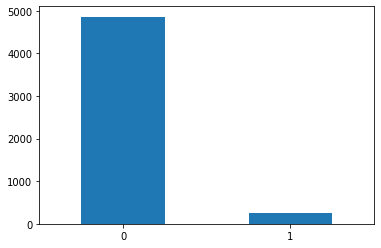

In [16]:
data.stroke.value_counts().plot.bar(rot = 0)

### Vyobrazení korelace mezi proměnnými

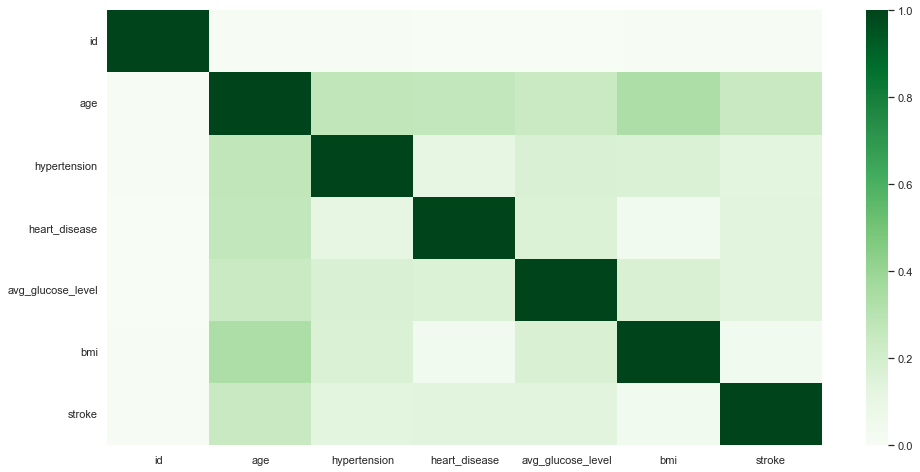

In [17]:
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),cmap="Greens");

#### Uložení korelace mezi proměnnými

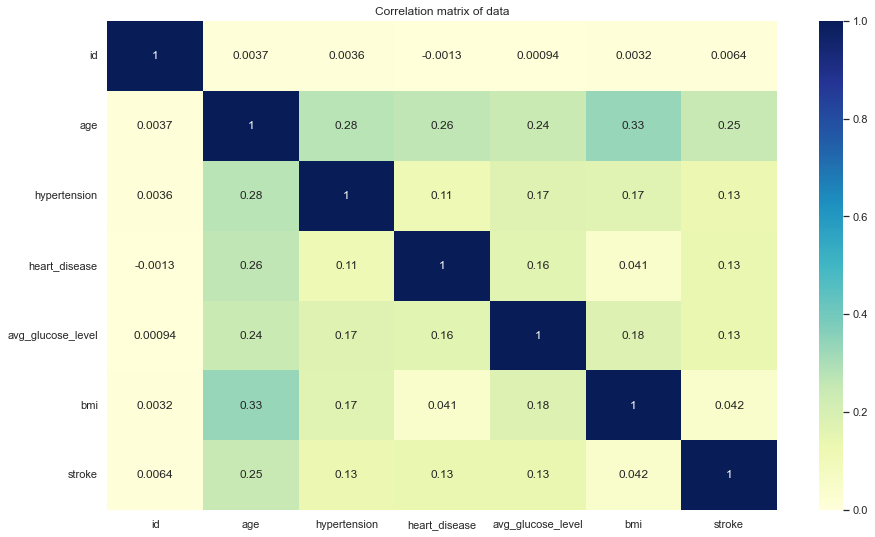

In [18]:
plt.figure(figsize=(15, 9))
plt.title('Correlation matrix of data')
cor = data.corr()
hm1 = sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.savefig('Correlation.pdf')

## Předzpracování dat

### Odstranění chybějících hodnot


In [19]:
# tady se pak pri trenovani modelu musi vyzkouset, zda nebude lepsi radky s chybejicimi hodnotami uplne smazat,
# pripadne tam misto prum. hodnoty dat treba nulu
data.dropna(inplace=True)
data.bmi = data.bmi.fillna(data.bmi.mean())

#### Extra: Tisk distribuce
* zobrazení rozložení age, average glucose a bmi

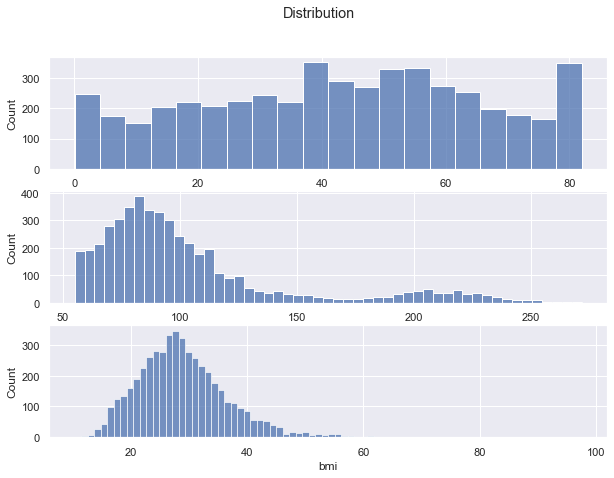

In [20]:
plt.subplots(3, 1, figsize=(10, 7))
plt.suptitle('Distribution')
plt.subplot(3, 1, 1)
sns.histplot(data['age'])
plt.subplot(3, 1, 2)
sns.histplot(data['avg_glucose_level'])
plt.subplot(3, 1, 3)
sns.histplot(data['bmi'])
plt.savefig('Distribution.pdf')

### Odvození nových sloupců

Pro zvýšení přehlednosti výsledného modelu a k přesnění predikce jsme se rozhodli pomocí intervalů převést numerické sloupce **age**, **avg_glucose_level** a **bmi**
na kategorické. Tím vznikly **sloupce age_cat**, **avg_glucose_level_cat** a **bmi_cat** s následujícími obory hodnot:

* **age_cat**: `{"Child", "Adult", "Elder"}` - *Intervaly (<=18), (<19, 59>), (>=60)*

* **avg_glucose_level_cat**: `{"Normal", "Prediabetes", "Diabetes"}` - *Intervaly dle [cdc.gov](https://www.cdc.gov/diabetes/basics/getting-tested.html)*

* **bmi_cat**: `{"Underweight", "Healthy Weight", "Overweight", "Obesity"}` - *Intervaly dle [cdc.gov](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html)*

In [21]:
data["age_cat"] = pd.cut(x=data["age"], bins=[0, 18, 59, np.inf], labels=["Child", "Adult", "Elder"])
data["avg_glucose_level_cat"] = pd.cut(x=data["avg_glucose_level"], bins=[0, 140, 199, np.inf], labels=["Normal", "Prediabetes", "Diabetes"])
data["bmi_cat"] = pd.cut(x=data["bmi"], bins=[0, 18.5, 24.9, 29.9, np.inf], labels=["Underweight", "Healthy Weight", "Overweight", "Obesity"])
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_cat,avg_glucose_level_cat,bmi_cat
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Elder,Diabetes,Obesity
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Elder,Normal,Obesity
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult,Prediabetes,Obesity
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Elder,Prediabetes,Healthy Weight
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Elder,Prediabetes,Overweight


### Odstranění nepotřebných sloupců

Sloupec **id** je jedinečný identifikátor, který ze své podstaty nemůže mít vliv na hodnotu cílové proměnné.

Sloupce **age**, **avg_glucose_level** a **bmi** jsou nyní zastoupeny jejich kategoriální variantou a nejsou již v datasetu potřeba.

Z těchto důvodů jsme tyto sloupce odstranili

In [22]:
data = data.drop('id', axis=1)
data = data.drop('age', axis=1)
data = data.drop('avg_glucose_level', axis=1)
data = data.drop('bmi', axis=1)
data.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,age_cat,avg_glucose_level_cat,bmi_cat
0,Male,0,1,Yes,Private,Urban,formerly smoked,1,Elder,Diabetes,Obesity
2,Male,0,1,Yes,Private,Rural,never smoked,1,Elder,Normal,Obesity
3,Female,0,0,Yes,Private,Urban,smokes,1,Adult,Prediabetes,Obesity
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1,Elder,Prediabetes,Healthy Weight
5,Male,0,0,Yes,Private,Urban,formerly smoked,1,Elder,Prediabetes,Overweight


#### Extra: Encode string values into numbers
* We dont want to use string in final models, change strings to corresponding integers
* encode only once (since we delete extra col, it results in error without the if)

In [23]:
if 'gender' in data.columns: # run only once
    le = LabelEncoder()
    data['gender_encoded'] = le.fit_transform(data['gender'])
    del data['gender']
    data['married_encoded'] = le.fit_transform(data['ever_married'])
    del data['ever_married']
    data['worktype_encoded'] = le.fit_transform(data['work_type'])
    del data['work_type']
    data['residence_encoded'] = le.fit_transform(data['Residence_type'])
    del data['Residence_type']
    data['smoker_encoded'] = le.fit_transform(data['smoking_status'])
    del data['smoking_status']
    
    data['age_encoded'] = le.fit_transform(data['age_cat'])
    del data['age_cat']
    data['avg_glucose_level_encoded'] = le.fit_transform(data['avg_glucose_level_cat'])
    del data['avg_glucose_level_cat']
    data['bmi_encoded'] = le.fit_transform(data['bmi_cat'])
    del data['bmi_cat']
    data.to_csv('data_preprocessed.csv') #save final preprocessed data\

## OVERSAMPLING

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<AxesSubplot:>

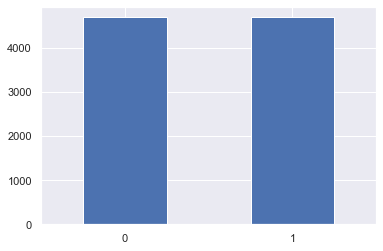

In [24]:
# RANDOM OVERSAMPLING
!pip install imbalanced-learn
from imblearn import over_sampling
from imblearn.over_sampling import ADASYN
ada = ADASYN()
sample_size = data["stroke"].value_counts()[1]

X_resampled, y_resampled = ada.fit_resample(data.iloc[:,0:sample_size], data['stroke'])
data = pd.concat([pd.DataFrame(X_resampled)], axis=1)
#data_oversampled.drop(data_oversampled.columns[len(data_oversampled.columns)-1], axis=1, inplace=True)
data.to_csv('data_oversampled.csv') #save final preprocessed data\
data.stroke.value_counts().plot.bar(rot = 0)

## Modelování

### Oddělení cílové proměnné od zbytku datasetu

In [25]:
X = data.drop('stroke', axis=1)
y = data['stroke']
X.head()
y.head()
print(X)
print(y)

      hypertension  heart_disease  gender_encoded  married_encoded  \
0                0              1               1                1   
1                0              1               1                1   
2                0              0               0                1   
3                1              0               0                1   
4                0              0               1                1   
...            ...            ...             ...              ...   
9389             0              0               0                1   
9390             0              0               0                1   
9391             0              0               0                1   
9392             0              0               0                1   
9393             0              0               0                1   

      worktype_encoded  residence_encoded  smoker_encoded  age_encoded  \
0                    2                  1               1            2   
1          

### Rozdělení na trénovací a testovací data


In [26]:
from sklearn.model_selection import train_test_split
x = data[['age_encoded', 'avg_glucose_level_encoded','hypertension', 'heart_disease','bmi_encoded', 'gender_encoded', 'married_encoded','worktype_encoded','residence_encoded','smoker_encoded']]
y = data['stroke']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [27]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7515, 10) (1879, 10) (7515,) (1879,)


#### Standardizace nevyvážených dat

In [28]:

sc = StandardScaler() # standardization of test and train set
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

#### Baseline
* the most basic algorithm, where we find whether is more probable to have or not have stroke in trainign dataset
* in the testing dataset, that everyone has or does not have a troke based on the first point
* useful to check whether other algorithms are working
* in this case the moct common scenario is NO STROKE

In [29]:
# BASELINE
y_prediction = np.zeros(len(x_test), dtype=int)
accuracy = accuracy_score(y_test, y_prediction)

#### KNN
* implemented for 1-10 nearost neigbors
* runs the algorithm 9 times in total and use the k-negbors with the best result

In [30]:
# KNN
best_accuracy = 0
best_k = 0
for k in range (1,10):
    model1 = KNeighborsClassifier(k).fit(x_train, y_train) # serach for k closest neigbors
    y_prediction1 = model1.predict(x_test)  # predict response
    accuracy1 = max(best_accuracy, accuracy_score(y_test, y_prediction1))
    if accuracy1 > best_accuracy: best_k = k
    best_accuracy = accuracy1

 #### DECISION TREE

In [31]:
# DECISION TREE
decisiontree = DecisionTreeClassifier()  # Create models
model2 = decisiontree.fit(x_train, y_train)
y_prediction2 = model2.predict(x_test)  # predict response
accuracy2 = accuracy_score(y_test, y_prediction2)

#### SVM

In [32]:
# SVM
svmmodel = svm.SVC(kernel='linear', probability=True)  # Linear Kernel
model3 = svmmodel.fit(x_train, y_train)
y_prediction3 = model3.predict(x_test)  # predict response
accuracy3 = accuracy_score(y_test, y_prediction3)

#### LOGISTIC REGRESSION

In [33]:
# LOGISTIC REGRESSION
logisticregression = LogisticRegression()
model4 = logisticregression.fit(x_train, y_train)
y_prediction4 = model4.predict(x_test)  # predict response
accuracy4 = accuracy_score(y_test, y_prediction4)

## Results
* Baseline: dummiest, other algorithms should be able to be more accure
* KNN, Decision Tree, SVM, Logistic Regression

Decision trees are working the worst in this scenario, the rest is giving as the same results as baseline, which shows how hard the task is. As the majority of results are "no stroke", the algorithm learns on his own that it is the best to say that everything is not a stroke.

#### Predictions table

In [34]:
report = pd.DataFrame()
report['Actual values'] = y_test
report['Predicted values KNN'] = y_prediction1
report['Predicted values Decision tree'] = y_prediction2
report['Predicted values SVM'] = y_prediction3
report['Predicted values Logistic Regression'] = y_prediction4
data.to_csv('predictions.csv') #save our predictions into csv file

#### Accuracies

In [35]:
print("Baseline: ",accuracy)
print("KNN: ",accuracy1, "(for "+str(best_k)+" closest neigbors)")
print("Decision Trees: ", accuracy2)
print("SVM :", accuracy3)
print("Logistic Regression: ", accuracy4)

Baseline:  0.5045236828100054
KNN:  0.8265034592868548 (for 3 closest neigbors)
Decision Trees:  0.8424693986162852
SVM : 0.6838744012772752
Logistic Regression:  0.6971793507184673


#### CONFUSION MATRIX

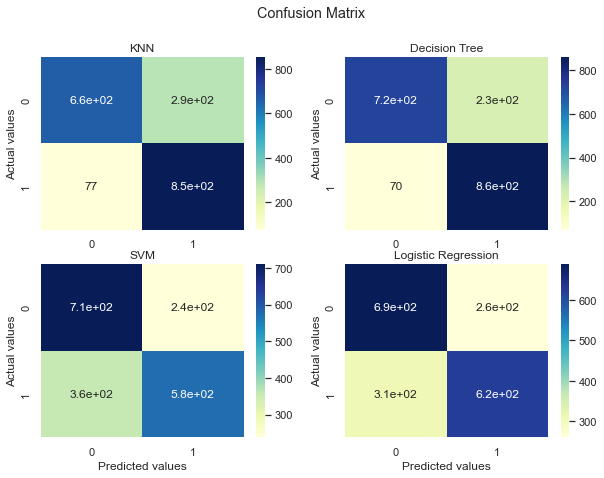

In [36]:
ConfusionMatrix1 = confusion_matrix(y_test, y_prediction1)
ConfusionMatrix2 = confusion_matrix(y_test, y_prediction2)
ConfusionMatrix3 = confusion_matrix(y_test, y_prediction3)
ConfusionMatrix4 = confusion_matrix(y_test, y_prediction4)

# KNN
plt.subplots(2, 2, figsize=(10, 7))
plt.suptitle('Confusion Matrix')
plt.subplot(2, 2, 1)
ax = sns.heatmap(ConfusionMatrix1, annot=True, cmap="YlGnBu")
plt.title("KNN")
ax.set_ylabel('Actual values')

# DECISION TREE
plt.subplot(2, 2, 2)
ax = sns.heatmap(ConfusionMatrix2, annot=True, cmap="YlGnBu")
plt.title("Decision Tree")
ax.set_ylabel('Actual values')

# SVM
plt.subplot(2, 2, 3)
ax = sns.heatmap(ConfusionMatrix3, annot=True, cmap="YlGnBu")
plt.title("SVM")
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')

# LOGISTIC REGRESSION
plt.subplot(2, 2, 4)
ax = sns.heatmap(ConfusionMatrix4, annot=True, cmap="YlGnBu")
plt.title("Logistic Regression")
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')
plt.savefig('Confusion Matrix.pdf')

#### ROS CURVE

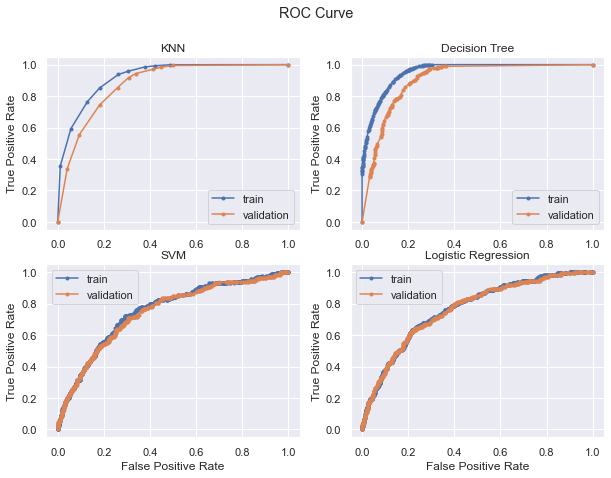

In [37]:
    plt.subplots(2, 2, figsize=(10, 7))
    plt.suptitle('ROC Curve')
    plt.subplot(2, 2, 1)
    train_probs1 = model1.predict_proba(x_train)
    train_probs1 = train_probs1[:, 1]
    fpr1_train, tpr1_train, _ = roc_curve(y_train, train_probs1)  # pos_label=1
    test_probs1 = model1.predict_proba(x_test)
    test_probs1 = test_probs1[:, 1]
    fpr1_test, tpr1_test, _ = roc_curve(y_test, test_probs1)  # pos_label=1
    plt.plot(fpr1_train, tpr1_train, marker='.', label='train')
    plt.plot(fpr1_test, tpr1_test, marker='.', label='validation')
    plt.title('KNN')
    plt.ylabel('True Positive Rate')
    plt.legend()

    # ROC CURVE DECISION TREE
    plt.subplot(2, 2, 2)
    train_probs2 = model2.predict_proba(x_train)
    train_probs2 = train_probs2[:, 1]
    fpr2_train, tpr2_train, _ = roc_curve(y_train, train_probs2)  # pos_label=1
    test_probs2 = model2.predict_proba(x_test)
    test_probs2 = test_probs2[:, 1]
    fpr2_test, tpr2_test, _ = roc_curve(y_test, test_probs2)  # pos_label=1
    plt.plot(fpr2_train, tpr2_train, marker='.', label='train')
    plt.plot(fpr2_test, tpr2_test, marker='.', label='validation')
    plt.title('Decision Tree')
    plt.ylabel('True Positive Rate')
    plt.legend()

    # ROC CURVE MODEL SVM
    plt.subplot(2, 2, 3)
    train_probs3 = model3.predict_proba(x_train)
    train_probs3 = train_probs3[:, 1]
    fpr3_train, tpr3_train, _ = roc_curve(y_train, train_probs3)  # pos_label=1
    test_probs3 = model3.predict_proba(x_test)
    test_probs3 = test_probs3[:, 1]
    fpr3_test, tpr3_test, _ = roc_curve(y_test, test_probs3)  # pos_label=1
    plt.plot(fpr3_train, tpr3_train, marker='.', label='train')
    plt.plot(fpr3_test, tpr3_test, marker='.', label='validation')
    plt.title('SVM')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    # ROC CURVE LOGISTIC REGRESSION
    plt.subplot(2, 2, 4)
    train_probs4 = model4.predict_proba(x_train)
    train_probs4 = train_probs4[:, 1]
    fpr4_train, tpr4_train, _ = roc_curve(y_train, train_probs4)  # pos_label=1
    test_probs4 = model4.predict_proba(x_test)
    test_probs4 = test_probs4[:, 1]
    fpr4_test, tpr4_test, _ = roc_curve(y_test, test_probs4)  # pos_label=1
    plt.plot(fpr4_train, tpr4_train, marker='.', label='train')
    plt.plot(fpr4_test, tpr4_test, marker='.', label='validation')
    plt.title('Logistic Regression')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.savefig('ROC Curve.pdf')